# MS Estonia Disaster Passenger List

#### MS Estonia sinking: One of the deadliest accidents in European waters
The sinking of the ferry vessel MS Estonia in the Baltic Sea marks the second-deadliest peacetime sinking of a European ship, after the Titanic, as well as the deadliest peacetime shipwreck to have taken place in European waters. At the time of the incident, the ship was carrying 989 people, of whom 852 lost their lives. When the MS Estonia sank it shook the shipping industry, due to its unprecedented extent in the number of victims, and the damage it was caused.
<br><br>
Facts<br>
When was the Sinking of the Estonia: September 28, 1994<br>
Where was the Sinking of the Estonia: Near the Turku Archipelago, in the Baltic Sea<br>
What was the Sinking of the Estonia death toll: 852 passengers and crew<br>

## Lets answer following questions? <br>

Who's more likely to survive the sinking based on data? <br>
Is age an indicator for survival? <br>
Is gender an indicator for survival? <br>
Did the crew aboard have a higher chance of survival than passengers? <br>


## To find out answers Lets Explore the data.

In [5]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import xgboost
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

In [7]:
ds=pd.read_csv("F:/ML/github/MS Estonia Disaster Passenger List/estonia-passenger-list.csv")

trn={"Sex":{"M":0,"F":1}}
trn1={"Category":{"P":0,"C":1}}



ds.replace(trn,inplace=True)
ds.replace(trn1,inplace=True)

In [8]:
ds.head(5)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,0,62,0,0
1,2,Estonia,LEA,AALISTE,1,22,1,0
2,3,Estonia,AIRI,AAVASTE,1,21,1,0
3,4,Sweden,JURI,AAVIK,0,53,1,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,1,55,0,0


Here we have to focus on the 4 columns
* Sex      - Gender of passenger	Male = 0, Female =1
* Age      - Age of passenger at the time of sinking	
* Category - The type of passenger	Passenger = 0 Crew=1
* Survived - Survival	0 = No, 1 = Yes

# Is Age and Sex an indicator for survival?

In [9]:
hist_data =[ds["Age"].values]
group_labels = ['Age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

* Age wise 20 to 70 the spread is High 
* less than 20 age and higher than 70 age people are very low

In [10]:
fig = px.box(ds, x="Sex", y="Age", points="all",)
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 0 Female =1")
fig.show()

* Age has much more Equal Spread based on the Gender.  

In [11]:
male=ds[ds["Sex"]==0]
female=ds[ds["Sex"]==1]

male_survi=male[ds["Survived"]==1]
male_not=male[ds["Survived"]==0]
female_survi=female[ds["Survived"]==1]
female_not=female[ds["Survived"]==0]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[ds["Survived"]==1]),len(male[ds["Survived"]==0]),
         len(female[ds["Survived"]==1]),len(female[ds["Survived"]==0])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()


Gender Report :

*Male Count = 503","Female Count = 486*

* Male 
   - Survived    - 11.1 % - 110
   - Not Survived - 39.7 % - 393
* Female
   - Survived - 2.73% - 27
   - Not Survived -46.4% - 459
   
>  Male are highly Survived  - 110 Male

>  Female are not highly Survived - 459 Female

### So the Gender factor is important for the Survival.

In [12]:
surv=ds[ds["Survived"]==1]["Age"]
not_surv=ds[ds["Survived"]==0]["Age"]
hist_data = [surv,not_surv]

group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

* Survival is high on 20 to 40
* The spread of Not survival is going through all ages.

In [13]:
fig = px.violin(ds, y="Age", x="Sex", color="Survived", box=True, points="all",
          hover_data=ds.columns)
fig.update_layout(
    title_text="Analysis in Age and Gender on Survival Status")
fig.show()

Age Report

* Survival spread is high in age's flow of 20 to 40
* The Survival is high for both male and female's age between 20 to 40 
* Gender are equally spreaded with Age distribution

###  So the Age factor is important for the Survival.


# Did the crew aboard have a higher chance of survival than passengers?

In [14]:
labels = ['Survived','Not Survived']
a,b=len(ds[ds["Survived"]==1][ds["Category"]==0]),len(ds[ds["Survived"]==0][ds["Category"]==0])

c,d=len(ds[ds["Survived"]==1][ds["Category"]==1]),len(ds[ds["Survived"]==0][ds["Category"]==1])



fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[a,b], name="Passenger"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[c,d], name="Crew"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Analysis in Category based on Survival Status",
    annotations=[dict(text='Passenger', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Crew', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

Category Report 

*Passenger count = 796 ","Crew Count = 193*

* Crew is having higher count of Survived people

### So the Cetegory factor is important for the Survival.

# Random Forest Model
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" width=400>

<br>

> Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

By the above analysis we came to know that "Sex","Age","Category" factors are impacting the survival.

So here we built Random forest model with those parameters. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

x=ds.loc[:,["Sex","Age","Category"]]
y=ds.loc[:,["Survived"]]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=400)


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)


pred=clf.predict(x_test)

In [16]:
print(Fore.GREEN + "Accuracy is : ",clf.score(x_test,y_test))

Accuracy is :  0.8737373737373737


Confusion matrix, without normalization
[[173   0]
 [ 25   0]]


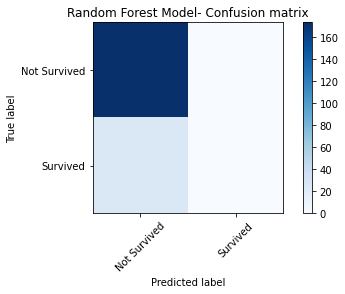

In [11]:
def plot_confusion_matrix(cm, names, title="Random Forest Model- Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["Not Survived","Survived"])

# Conclusion

<br>
1.  Who's more likely to survive the sinking based on data?
<br>
Ans : as we saw from analysis survival rate of male is more than female, also most of the survived people are most from crew members and all with the age between 20 to 70.
<br>
<br>
2.  Is age an indicator for survival?
<br>
Ans : Age wise 20 to 70 the spread is High means less than 20 age and higher than 70 age peoples have low survival rate.
<br>
<br>
3.  Is gender an indicator for survival?
<br>
Ans : Male are highly Survived - 110 Male as compared female - 27
<br>
<br>
4.  Did the crew aboard have a higher chance of survival than passengers?
<br>
Ans : Crew is having higher count of Survived people with 20.2% and passengers have only 12.3%

